#Machine Learning: Introdução a algoritmos não supervisionados

In [ ]:
# Ler o arquivo tem dois modos - Guilherme Silveira  ou o 
# uri = "[link]"
# dados = pd.read_csv(uri, sep = ',')
# ou |  pd.read_csv("link")
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
uri = "https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv"
filmes = pd.read_csv(uri, sep = ',')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Vamos traduzir os data frames
# filmes.columns = ['filmeID', 'titulo', 'generos'] | COmo ele colocou o modo do Guilherme

a_renomear = {
    'movieId':'filme_id',
    'title': 'titulo',
    'genres': 'genero'
}
filmes = filmes.rename(columns = a_renomear)
filmes.head()

,filme_id,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Extraindo os Dummies


In [ ]:
# Filmes sobre generos e o titulo - tipos deles - identificar os generos
# QUais deles influenciam ou não... Jumanji e Toy Story
# Ele retorna o conteúdo categorico binário

generos = filmes.genero.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Vamos concatenar com o dataframe com um e outro
# um embaixo do outro ou do lado do outro
# Axis que o eixo vai trabalhar é o eixo 1


dados_dos_filmes = pd.concat([filmes, generos], axis= 1)
dados_dos_filmes.head()

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Escalando os Dados


In [ ]:
# Escalar esses generos
# Reescalar esses dados - não somente um genero é tão ele como os outros generos
# Tal genero influencia um do que outro - importamos um metodo que transformamos escalados
# generos_escalados.shape | quantos temos no dataframe  linhas e colunas

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

#Resumo

Com isso, podemos extrair os dummies da coluna de gêneros. Logo, vamos falar para o nosso Dataframe de filmes pegar a coluna gêneros como string (str) e pegar os dummies (get_dummies):

`generos = filmes.generos.str.get_dummies()`

___________________________________________________________
______


Isso retorna para gente um Dataframe com os dummies dos gêneros.

Podemos pegar este Dataframe e pedir para o pandas concatená-lo (concat) com o de filmes com as colunas (axis=1).
```
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
```
_____________
____________
Por fim, temos que reescalar os dummies para saber quais dos gêneros mais influenciam os filmes. Portanto, vamos importar o escalador da biblioteca sklearn e criar um objeto a partir da classe StandardScaler:

from sklearn.preprocessing import StandardScaler

```
scaler = StandardScaler()
```

Vamos falar para o scaler aprender com os dummies e transformá-los (fit_transform) para que dessa forma, tenhamos mais informações sobre como os gêneros influenciam o filme:
```
generos_escalados = scaler.fit_transform(generos)
```
Podemos ver os novos gêneros reescalados colocando a variável como última instrução no bloco do documento do colaboratory:

`generos_escalados`

# Conhecendo o KMeans

In [ ]:
# print('Grupos {}'.format(modelo.labels_))  | modelo antigo
# Vamos agrupar duas categorias em uma só - n_clusters = 3 deles apenas
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters = 3)

modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [0 0 2 ... 2 0 2]


# KMeans 

Vamos começar com 3 grupos, o KMeans vai jogar 3 centroids- Esses 3 centroids estão nos pontos centrais de cada grupo.
KMeans vai calcular uma distância entre os centroids - Ponto azuil, vermelho e verde - Um lado vai pertencer a cada grupo.

Ele vai alocar em um grupo vermelho - depois atualizar a posição dos centroids para otimizar a distancia com pontos do grupo. Ao final os pontos estarão em cada grupo.

[Naftaliharris](http://www.naftaharris.com/blog/visualizing-k-means-clustering)



#Question -

### Quando criamos um modelo utilizando K-Means precisamos passar o número de clusters para que o objeto seja instanciado. O que significa esse número de clusters?

`modelo = KMeans(n_clusters=3)`

Alternativa correta
O número de clusters representa o número de grupos que o K-Means irá utilizar para alocar os dados. Esse número é o quantidade de grupos que teremos ao final da execução do algoritmo


__Alternativa correta! O K-Means precisa saber o número de grupos antes de ser instanciado. É a partir desse número que ele consegue classificar os dados.__

.
____________________

Em primeiro lugar, temos que importar do módulo de cluster da sklearn o algoritmo do K-Means.

```
from sklearn.cluster import KMeans
```

Após isso, podemos criar nosso objeto que representará o modelo KMeans. Para criar um objeto do K-Means, precisamos falar o número de clusters (n_clusters), isto é, quantos grupos diferentes serão agrupados. No caso, apenas para testar o algoritmo, vamos passar três como valor:

```
modelo = KMeans(n_clusters=3)
```

Em seguida, podemos falar para o K-Means agrupar os dados (generos_escalados) para a gente através do método fit:

```
modelo.fit(generos_escalados)
```

Podemos ver os resultados do agrupamento imprimindo os rótulos (labels_) do modelo:
```
print(f'Grupos {modelo.labels_}')
```
----------------------
O que aprendemos?

* A criar um modelo K-Means
* Como o K-Means funciona
* O que são os centroides
* a visualização dos centroides e a sua classificação

In [ ]:
# Centro de cada grupo, imprimir o centro de cada grupo - modelo.cluster_centers_
# generos.columns - quanto maior o número mais dentro ele vai estar no grupo.
# Vamos transformar em um gráfico

print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.45273487  1.39022555  1.54676194  1.59076882  0.06014361
  -0.33044939 -0.21013204 -0.68055182  1.10218472 -0.09492563 -0.25016683
   0.57316244  0.23982059 -0.14608526 -0.29608604  0.51638707 -0.42369626
  -0.17446875 -0.10263801]
 [-0.05917995  0.42659014 -0.14749301 -0.23458962 -0.26217426 -0.56155714
   0.86731853 -0.21347157  0.06291107 -0.16099515  0.27757208  0.40864452
  -0.03922233 -0.17924792  0.62948858 -0.31864418  0.13019843  1.45684699
  -0.11604505 -0.07099841]
 [ 0.03633547 -0.26758889 -0.2429199  -0.24227966 -0.2408689   0.20996098
  -0.27276413  0.13034364  0.12260512 -0.17509185 -0.08964258 -0.10802726
  -0.10872328  0.01917364 -0.21829995  0.19074996 -0.16369058 -0.48665405
 

In [ ]:
# vamos colocar o Dataframe

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,0.452735,1.390226,1.546762,1.590769,0.060144,-0.330449,-0.210132,-0.680552,1.102185,-0.094926,-0.250167,0.573162,0.239821,-0.146085,-0.296086,0.516387,-0.423696,-0.174469,-0.102638
1,-0.059180,0.426590,-0.147493,-0.234590,-0.262174,-0.561557,0.867319,-0.213472,0.062911,-0.160995,0.277572,0.408645,-0.039222,-0.179248,0.629489,-0.318644,0.130198,1.456847,-0.116045,-0.070998
2,0.036335,-0.267589,-0.242920,-0.242280,-0.240869,0.209961,-0.272764,0.130344,0.122605,-0.175092,-0.089643,-0.108027,-0.108723,0.019174,-0.218300,0.190750,-0.163691,-0.486654,0.083920,0.050453


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f240d9d9550>,
      dtype=object)

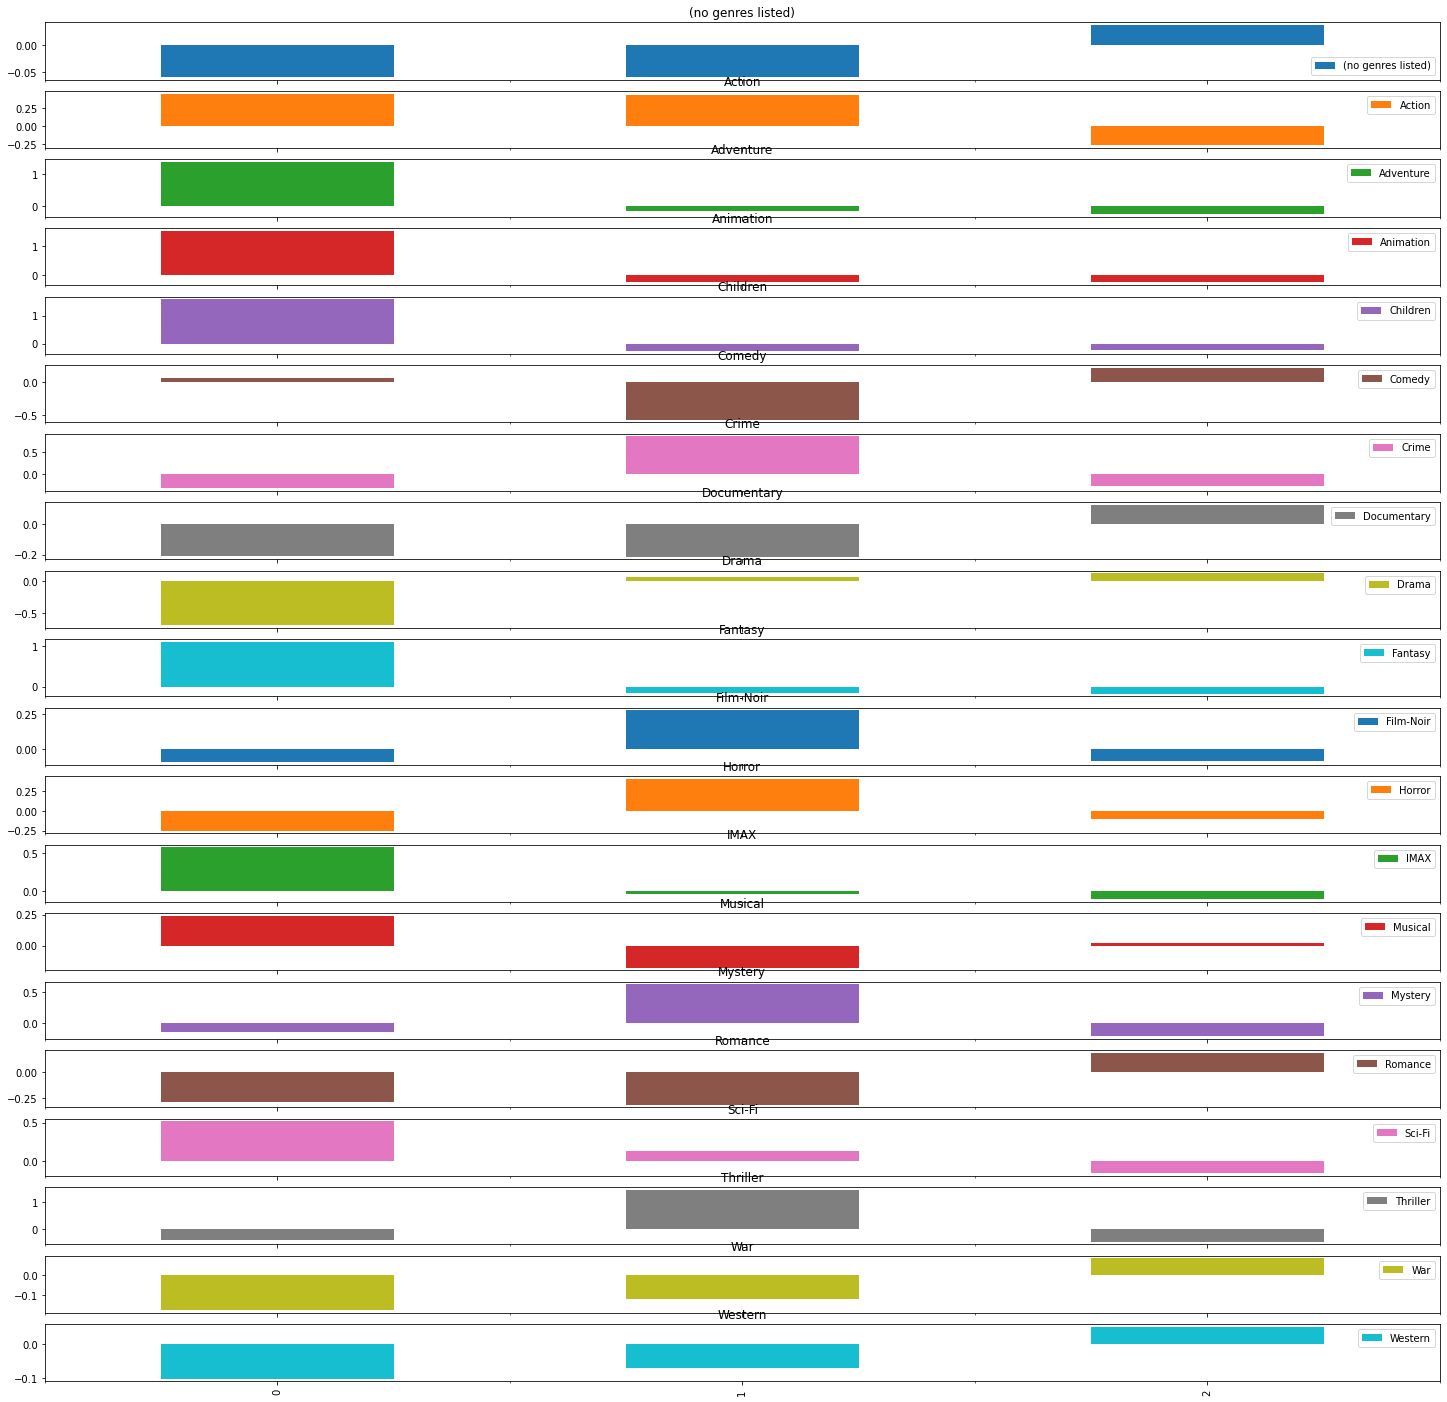

In [ ]:
# Vamos plotar - 3 grupos em um único gráfico
# vamos plotar separado e maior - facilitar a visualização
# figsize - mostra uma amplitude maior do gráfico - somente por grupos.plot.bar() não consta eles separadamente - subplots para separar os generos

grupos.plot.bar(subplots = True, 
                figsize = (25,25))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f240cdb16d8>,
      dtype=object)

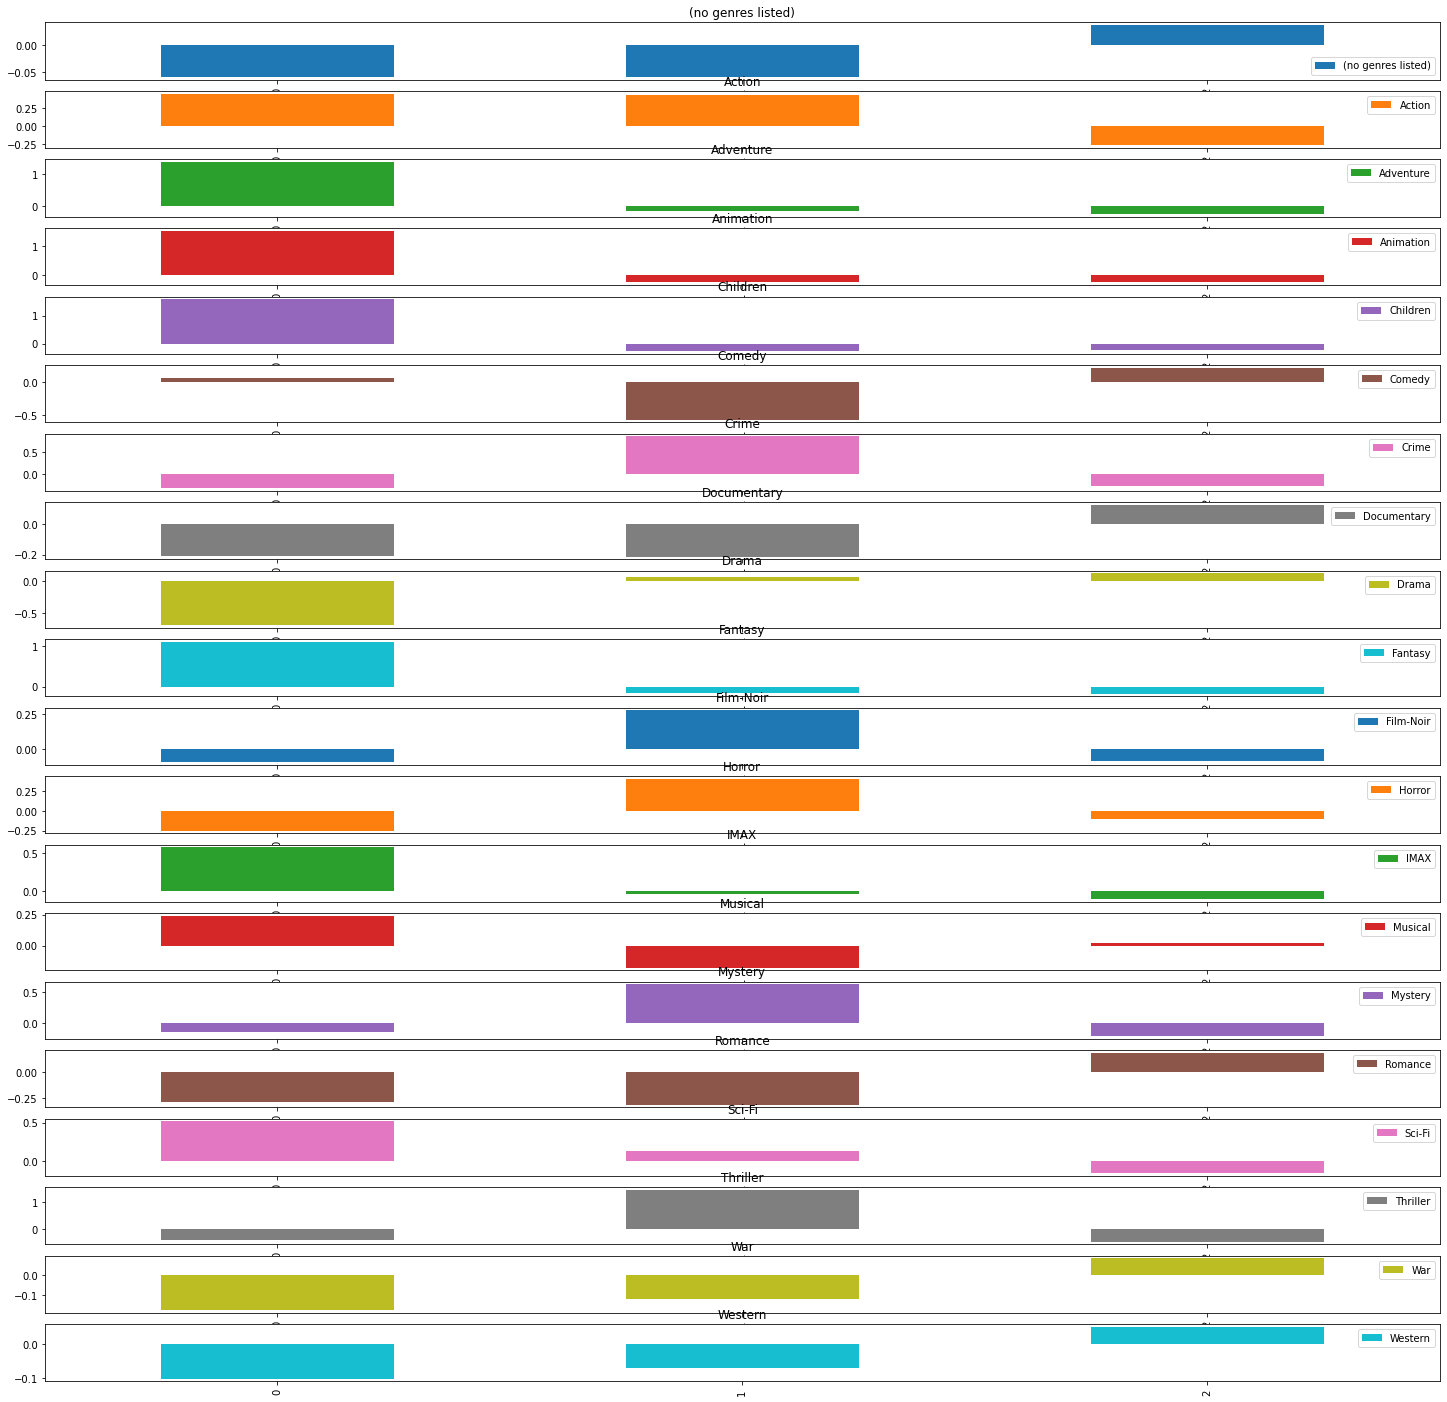

In [ ]:
# Percebemos que ele pertence a qual grupo, apenas vendo até o final do gráfico - vamos ajustar no dataframe - por grupo, 3 subplots por grupo e naõ compartilhar as infos por baixo
# 20 subgraficos, colocar apenas 3 por grupos - fazer o modo ao contrário do gêneros por grupo - inverter os generos como linhas e os grupos como colunas
# Transposição - pegar a matriz transposta - linha vira coluna e a coluna vira linha.
grupos.plot.bar(subplots = True,
                figsize= (25,25), sharex = False)

In [ ]:
# Vamos mudar a transposição do Dataframe
# Teste para visualizar
grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose()

,0,1,2
(no genres listed),-0.059180,-0.059180,0.036335
Action,0.452735,0.426590,-0.267589
Adventure,1.390226,-0.147493,-0.242920
Animation,1.546762,-0.234590,-0.242280
Children,1.590769,-0.262174,-0.240869
Comedy,0.060144,-0.561557,0.209961
Crime,-0.330449,0.867319,-0.272764
Documentary,-0.210132,-0.213472,0.130344
Drama,-0.680552,0.062911,0.122605
Fantasy,1.102185,-0.160995,-0.175092


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f240b1755f8>,
      dtype=object)

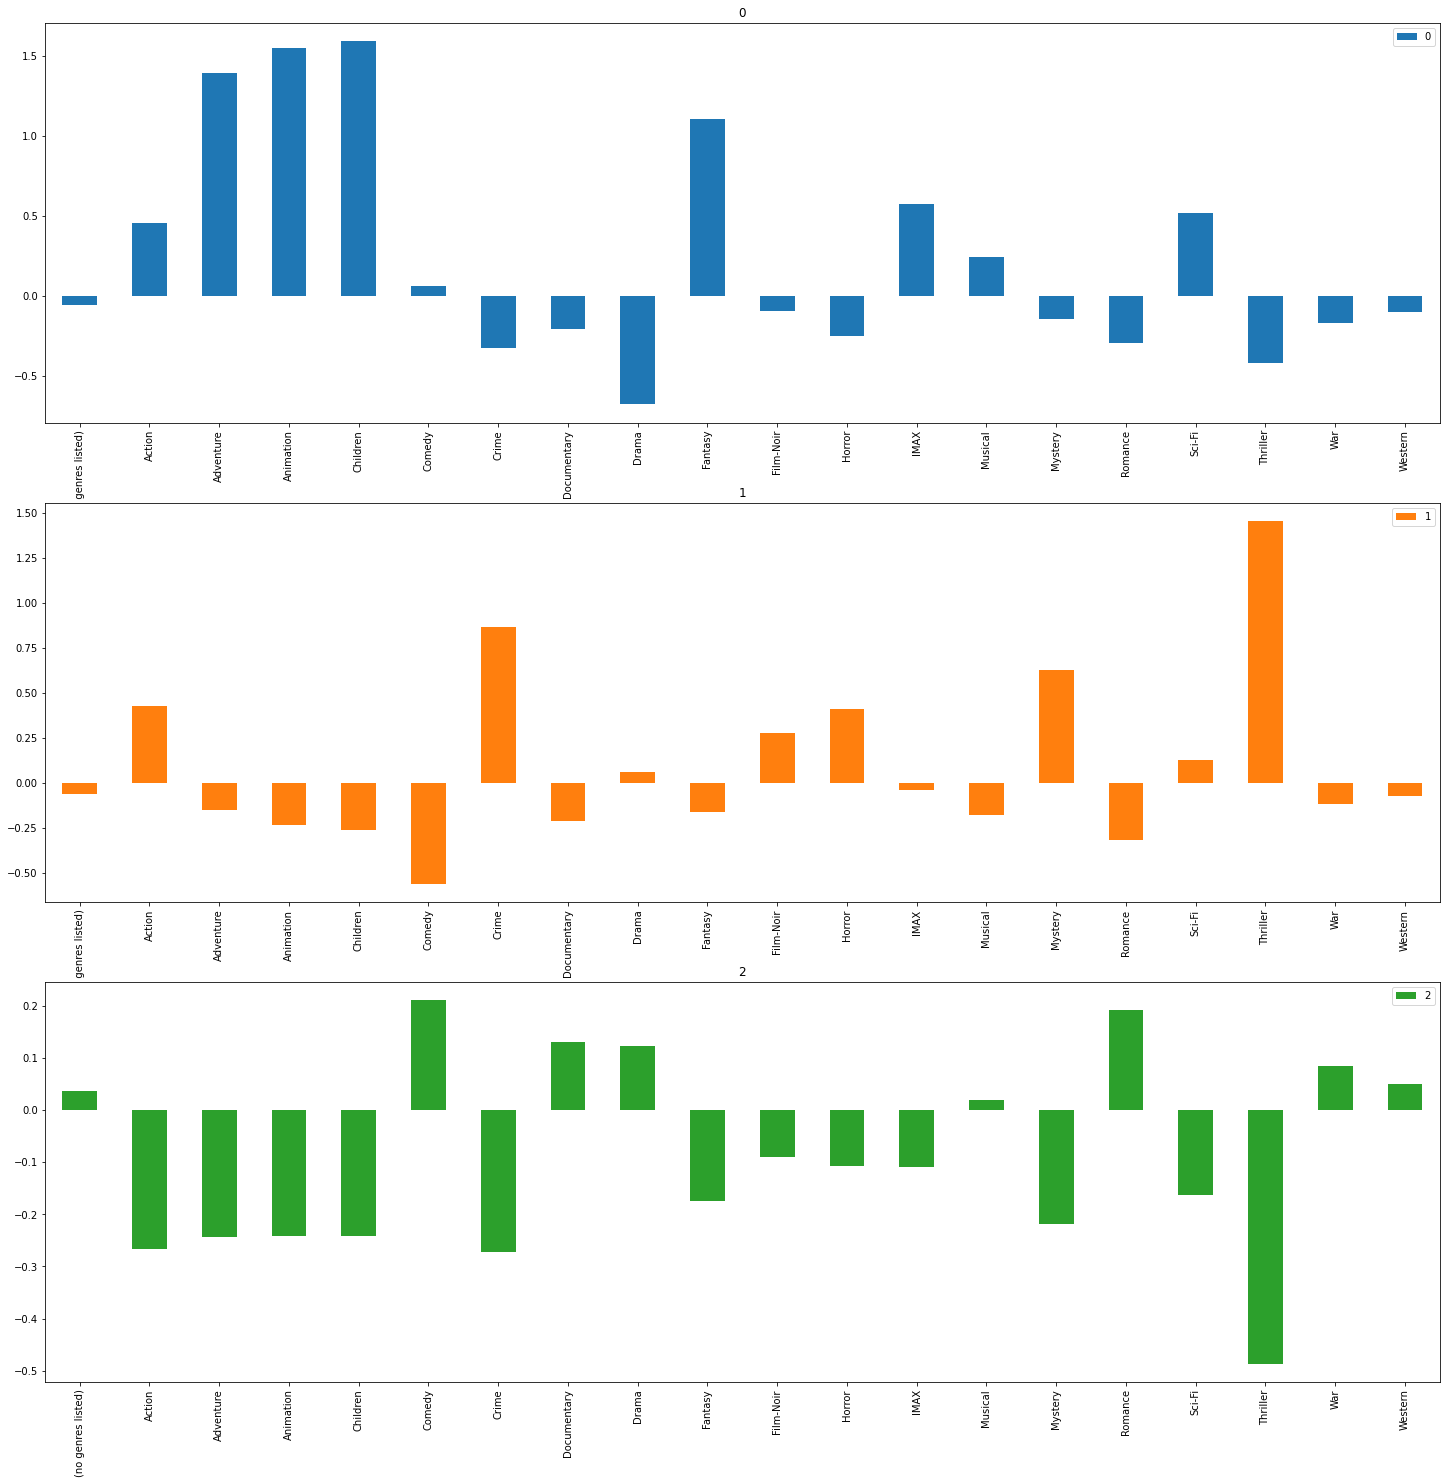

In [ ]:
# vamos modificar a mudança do transpose

grupos.transpose().plot.bar(subplots = True,
                            figsize = (25, 25), sharex = False)


In [ ]:
# Vamos fazer um filtro - do nosso modelo os rotulos - Labels 
# filtro dos filmes com uma amostra de 10 filmes
grupo = 0

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
421,484,Lassie (1994),Adventure|Children,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1979,2628,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8254,104875,"History of Future Folk, The (2012)",Adventure|Comedy|Musical|Sci-Fi,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
574,704,"Quest, The (1996)",Action|Adventure,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2928,3927,Fantastic Voyage (1966),Adventure|Sci-Fi,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7820,92681,Journey 2: The Mysterious Island (2012),Action|Adventure|Comedy|Sci-Fi|IMAX,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
9056,141994,Saving Christmas (2014),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9537,172583,Investigation Held by Kolobki (1986),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2106,2800,Little Nemo: Adventures in Slumberland (1992),Adventure|Animation|Children|Drama|Fantasy,0,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
6825,61210,Mutant Chronicles (2008),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Visualizando os Centróides

Vimos que o K-Means utiliza o conceito de centroides para agrupar os dados. Mas como podemos visualizá-los em um gráfico?

Vamos pedir para a biblioteca `sklearn` gerar alguns dados em duas dimensões para conseguirmos visualizar seus centroides.

Para criar os dados, vamos utilizar a função `make_blobs` da biblioteca sklearn no módulo dos `datasets`. Essa função gera dados em formas de "bolhas", isto é, os dados são gerados em forma de grupos:

```
A função make_blobs nos retorna os xn... e o valor de y, isto é, as variáveis independentes e a variável dependente.
```
```
from sklearn.datasets import make_blobs
```

Como queremos os dados em duas dimensões, falamos que o número de features `(n_features)` deve ser igual a 2 com 1000 exemplos `(n_samples)` de testes e para termos os mesmos dados, vamos setar o parâmetro de aleatoriedade como 7 `(random_state)`:

```
dados, _ = make_blobs(n_samples=1000, n_features=2, random_state=7)
```
```
Como o make_blobs nos retorna um par de dados (x, y) e não queremos o y, usamos o underscore (_) para ignorar o retorno dessa variável.
```

Vamos transformar estes dados em um `DataFrame` do pandas e renomear as colunas para `coluna1` e `coluna2`.

```
dados = pd.DataFrame(dados, columns=['coluna1', 'coluna2'])
dados.head()
```
O resultado é o seguinte:

O resultado é o seguinte:

| coluna1	| coluna2 |
|---------|---------|
| 0	9.829632 |	0.763094 |
| 1	-9.723548 |	4.100788 |
| 2	10.403457 |	1.761671 |
| 3	-2.253417 |	4.660486 |
|4	13.059859 |	-0.004112 |



## Em seguida, cruzamos os dados das colunas e plotamos a distribuição.
```
import matplotlib.pyplot as plt

plt.scatter(x=dados.coluna1, y=dados.coluna2)
```
![](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/blobs.png)



## Pedimos ao `KMeans` para criar um modelo com 3 grupos e segmentar os nossos dados baseado no modelo criado.
```
modelo = KMeans(n_clusters=3)
grupos = modelo.fit_predict(dados)
```
Plotamos os dados segmentados identificando os grupos com cores distintas `(c=grupos)` e vívidas `(cmap='viridis')`.
```
plt.scatter(x=dados.coluna1, y=dados.coluna2, 
            c=grupos,
           cmap='viridis')
```
![](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/blobscoloridos.png)

Geramos pontos centrais para os grupos, chamados `centroides`, e plotamos novamente nossos grupos.
```
centroides = modelo.cluster_centers_
plt.scatter(dados.coluna1, dados.coluna2,
            c=grupos,
           cmap='viridis')
```
O `pandas` nos devolve os `centroides` em forma de matriz, então montamos a localização cartesiana pegando a posição 0 para o eixo x `(centroides[:,0])` e a posição 1 para o eixo y `(centroides[:,1])` . Também podemos estilizar a representação do nosso `centroide`, marcando como um X `(marker='X')`, setando o tamanho `(s=169)`, a largura da linha `(linewidths=5)`, cor `(color=g)` e a hierarquia de aparição `(zorder=8)`.

```
plt.scatter(centroides[:, 0], centroides[:, 1],
           marker='X', s=169, linewidths=5,
           color='g', zorder=8)
```
[](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/centroides.png)

Com isso, temos nossos dados plotados em 3 grupos de cores distintas com `centroides` bem localizados.

In [ ]:
# temos 20 linhas - 2D - Algoritmos de redução - Visualização de dados 

from sklearn.manifold import TSNE

In [ ]:
# modelo parecido com scaler
# Criou um array do numpy
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-30.856764 ,  55.375664 ],
       [  7.5333123,  54.22053  ],
       [ -6.7930684, -24.56958  ],
       ...,
       [ 11.261067 ,  -3.3014245],
       [ 55.93164  ,  40.270226 ],
       [-18.590828 ,  15.840892 ]], dtype=float32)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


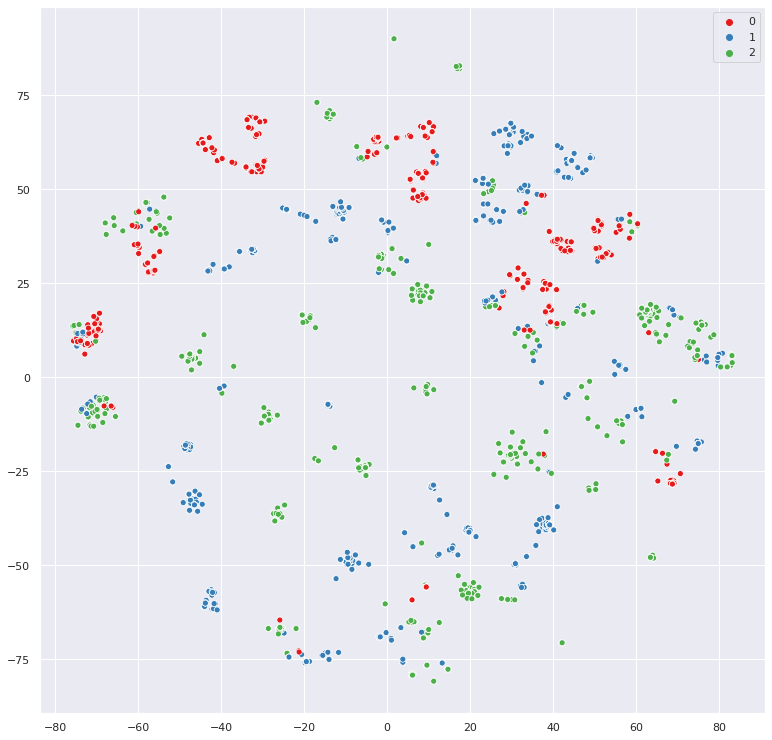

In [ ]:
# Do Array vamos pegar todas as linhas e a primeira coluna 0 [:, 0]
# Criamos o dicionário com o tamanho da fitura - sns.set(rc={'figure.figsize': (13,  13)})
# hue = modelo.labels | as cores para o nosso algoritmo
# Palette = sns.color_palette('Set1, 3) | Para deixar mais vivos o nosso plot.

import seaborn as sns

sns.set(rc = {'figure.figsize': (13, 13)})
sns.scatterplot(x= visualizacao[:, 0],
                y= visualizacao[:, 1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 3))



##Question
Quando vamos plotar um gráfico, geralmente, visualizamos os dados em duas dimensões - algumas vezes em três.

No nosso caso, quando plotamos o gráfico com os gêneros dos filmes, antes de criá-lo precisamos diminuir as dimensões. Temos 20 gêneros diferentes, ou seja, vinte dimensões e, por isso, rodamos o algoritmo TSNE para reduzir para duas dimensões.

Vimos que sempre que reduzimos as dimensões temos um problema, qual é esse problema?
____________________________
## Resposta: 

Ao reduzirmos o número de dimensões, perdemos informações! Por isso, quando plotamos o gráfico, podemos pensar quais grupos estão próximos uns dos outros, quando na verdade não estão


Quando reduzimos a dimensionalidade, perdemos informações sobre como os dados estão dispostos. Por exemplo, podemos pensar que dois grupos estão próximos quando olhamos em duas dimensões, mas na verdade eles estão distantes em outras das n-dimensões.

**O que vimos nessa aula: **

* Como reduzir a dimensão com TSNE
* Como plotar um gráfico de pontos com o seaborn
* Como visualizar os centróides
* Como realizar filtros nos dataframes

#Escolhendo o número de grupos


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f24097edcc0>,
      dtype=object)

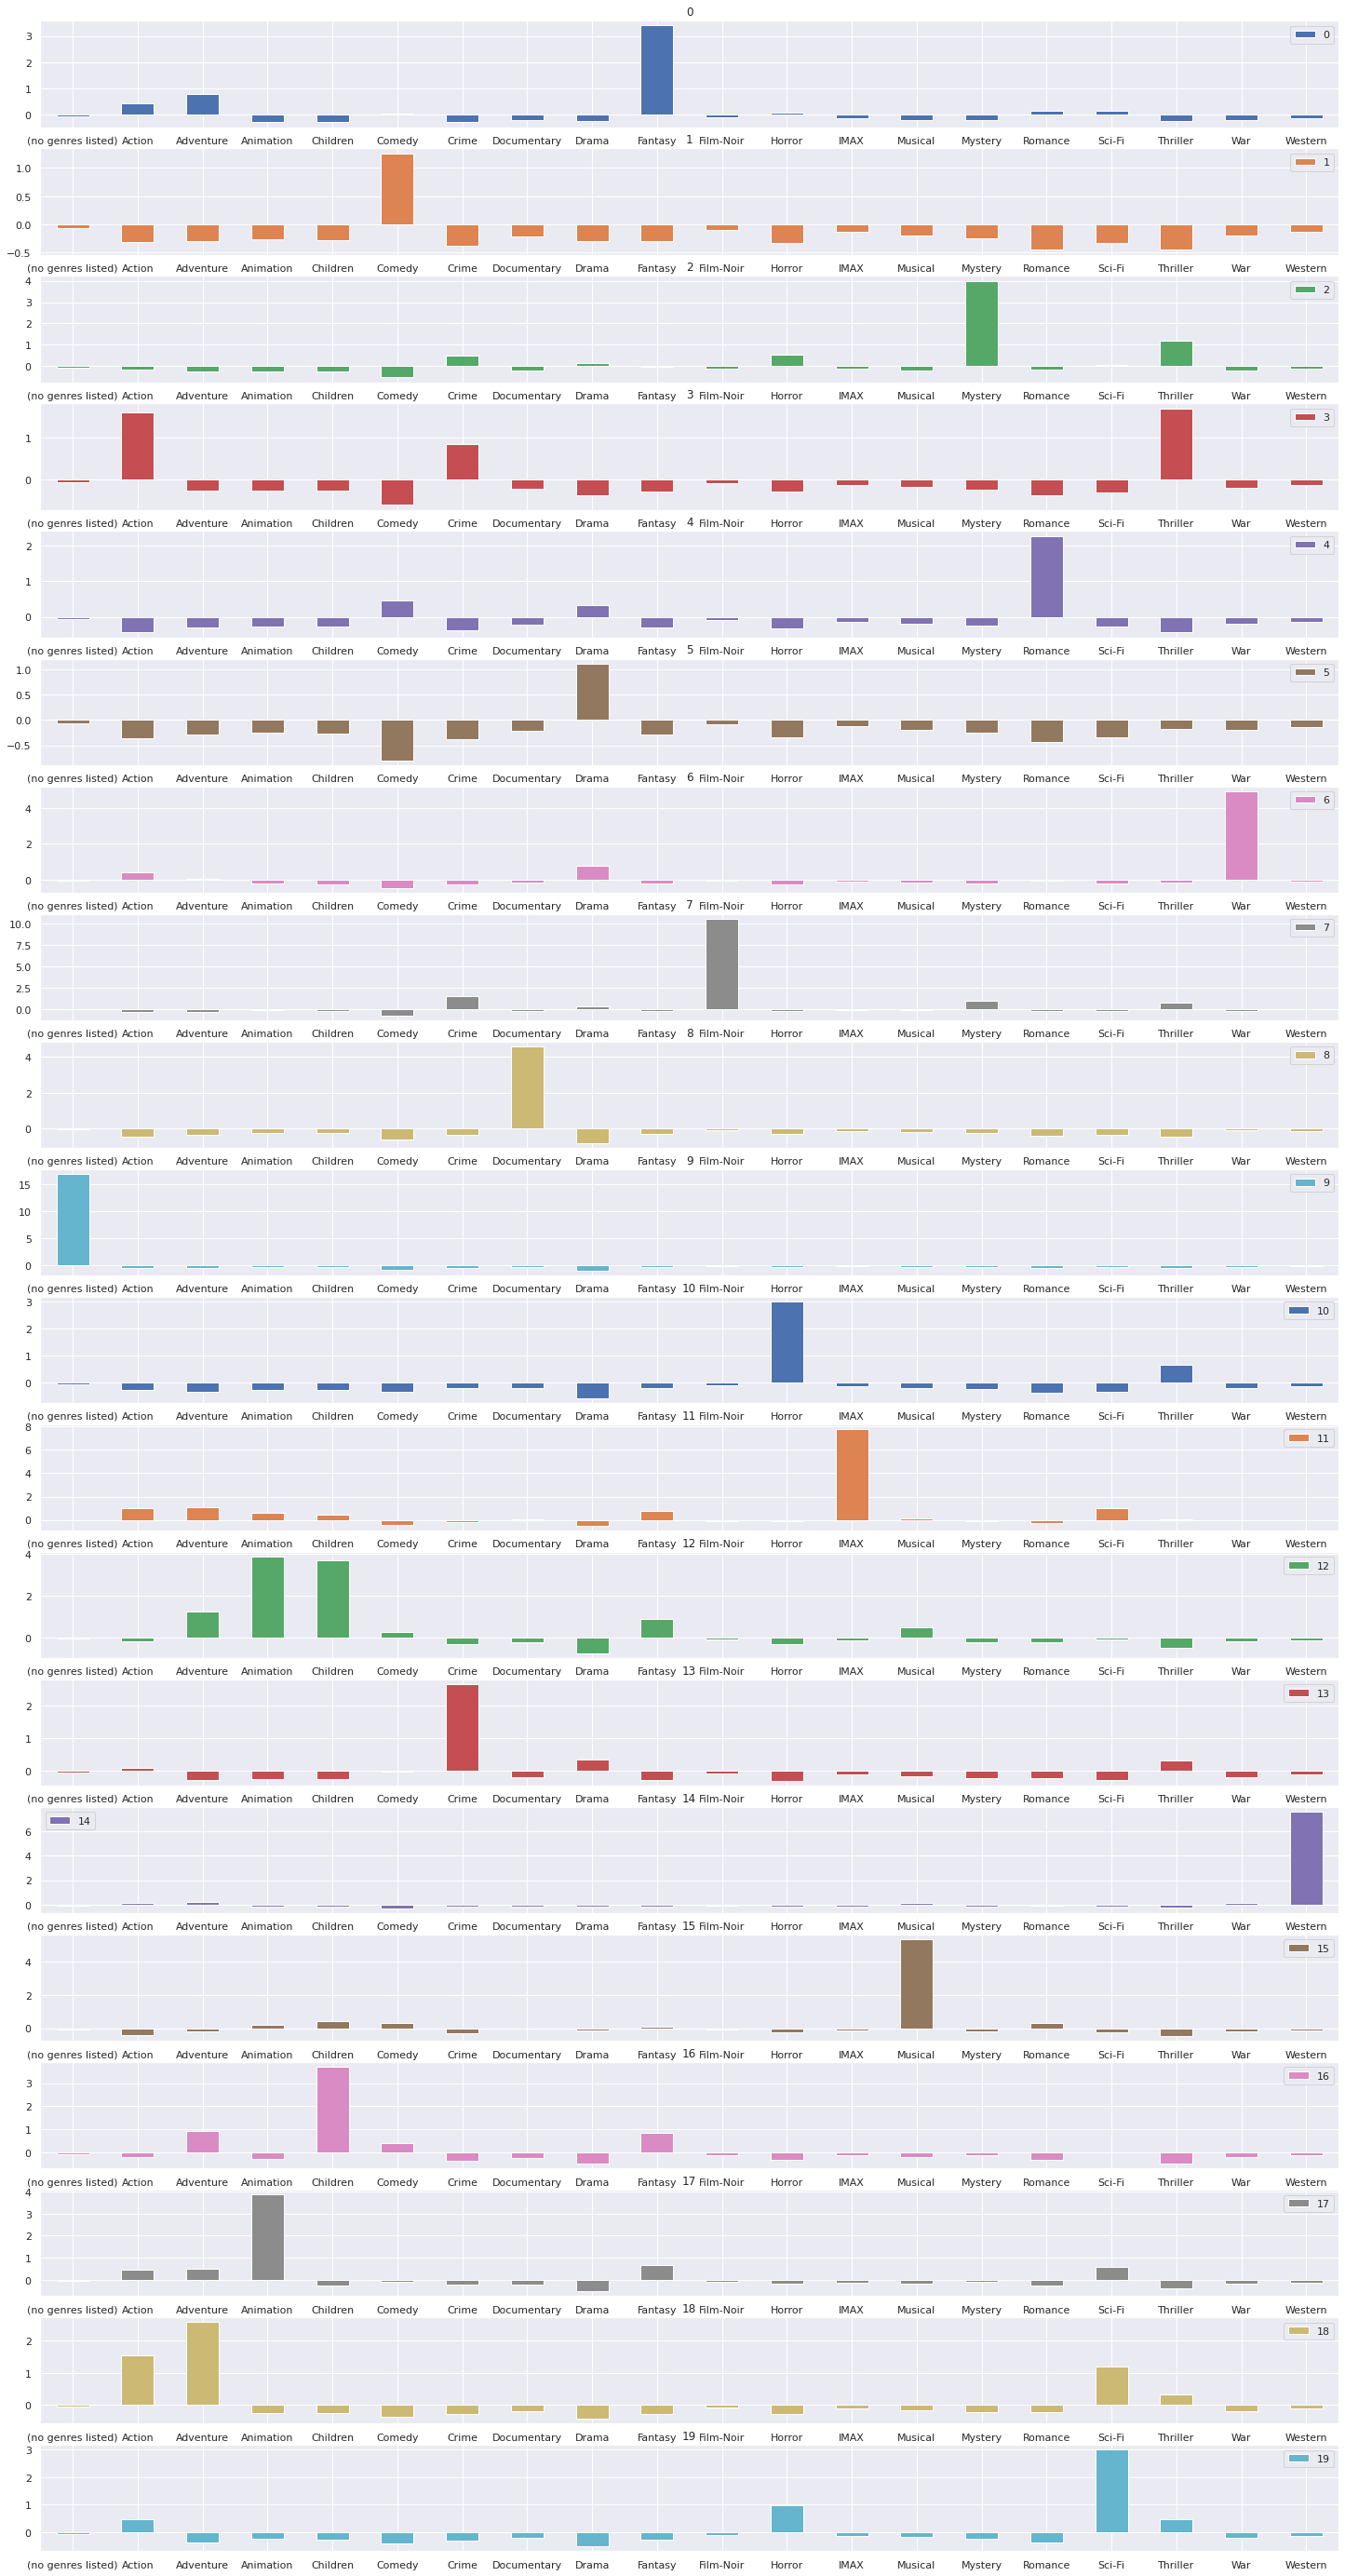

In [ ]:
# vamos fazer a máquina aprender
# Modelo.fit( os generos)
# nome = pd.DataFrame( modelo.cluster_centers_, colunas = generos.colunas)
# transpose, plot.bar, subplots = sim, figsize (25, 50 pra expandir, sharex = falso, rot para inverter a legenda)

modelo = KMeans(n_clusters= 20)

modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                            figsize = (25, 50),
                            sharex = False, rot = 0)

In [ ]:
grupo = 2

filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8491,113350,I'll Follow You Down (2013),Drama|Mystery|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
5327,8860,Cellular (2004),Action|Crime|Drama|Mystery|Thriller,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
4722,7044,Wild at Heart (1990),Crime|Drama|Mystery|Romance|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0
1226,1627,U Turn (1997),Crime|Drama|Mystery,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1484,2009,Soylent Green (1973),Drama|Mystery|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
2449,3262,Twin Peaks: Fire Walk with Me (1992),Crime|Drama|Mystery|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0
1441,1964,Klute (1971),Drama|Mystery,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
8379,109578,Non-Stop (2014),Action|Mystery|Thriller,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6264,47261,"Night Listener, The (2006)",Fantasy|Mystery|Thriller,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
5525,26554,"Quiet Earth, The (1985)",Drama|Mystery|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters= numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

In [ ]:
kmeans(20, generos_escalados)

[20, 54661.61066617138]

# O método Cotovelo

Dessa vez, vamos executar a função kmeans() com o valor 3 e os generos_escalados como parâmetros. Dessa vez, teremos como retorno um erro de 166226.3286, diferente dos 57104.9372 de quando executamos com 20 clusters. Isso significa que a distância entre os centroides foi menor com 20 clusters do que com 3.

Mas isso é natural, afinal, quanto mais clusters, menor será a distância entre os centroides. Porém, nesse caso, podemos ter dados em grupos diferentes que, na verdade, deveriam pertencer ao mesmo grupo.

In [ ]:
# Grupo de 3 Clusters - número de erros
# Quanto mais clusters tivermos menor o erro, mais a distância entre os centróids é menor - Ter dados em grupos diferentes, mas deveriam pertencer ao mesmo grupo
#  quantos grupos deveríamos ter -

kmeans(3, generos_escalados)

[3, 166184.76393344058]

In [ ]:
# percorrer 40 vezes, vamos executar a função kmeans - instanciar o objeto do kmeans- numeros de clusters com os generos.
# temos umas listas com cada item com número de clusters e a inertia o erro - modelo_inertia
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 168285.83091442334],
 [4, 157001.61077589236],
 [5, 148667.49155487487],
 [6, 138094.38440940177],
 [7, 128008.27197233033],
 [8, 120287.31390625972],
 [9, 111044.47271900236],
 [10, 103590.86976922688],
 [11, 93996.49100605777],
 [12, 87888.25435249163],
 [13, 78659.64660857513],
 [14, 74315.04878544624],
 [15, 68124.53956751901],
 [16, 64592.461205749656],
 [17, 61273.69140244127],
 [18, 58727.90547236791],
 [19, 56859.07674818074],
 [20, 55766.70790614063],
 [21, 54259.15682226427],
 [22, 52830.92886074054],
 [23, 49830.20999024193],
 [24, 49102.60561326493],
 [25, 48653.96932970099],
 [26, 47184.11314838206],
 [27, 46303.27265058313],
 [28, 45279.42018547109],
 [29, 44006.6818975557],
 [30, 43345.76008566978],
 [31, 41568.48924670861],
 [32, 41075.87301956466],
 [33, 39576.60121917854],
 [34, 39146.96148622086],
 [35, 38379.98099433881],
 [36, 37713.92596443594],
 [37, 37392.10887766024],
 [38, 36477.28011129721],
 [39, 35964.957732883

In [ ]:
resultado = pd.DataFrame(resultado,
             columns = ['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,168285.830914
3,4,157001.610776
4,5,148667.491555
5,6,138094.384409
6,7,128008.271972
7,8,120287.313906
8,9,111044.472719
9,10,103590.869769


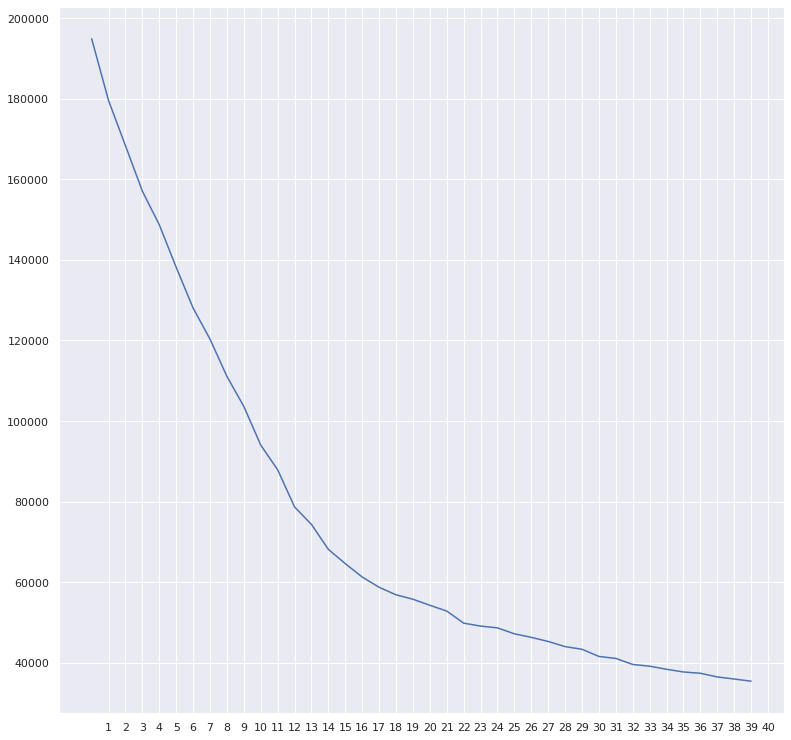

In [ ]:
# "elbow method" - Método de cotovelo ponto de quebra - otimizaria o número de grupos - 
# A curva vai caindo ali tem um momento de quebra - no ponto é número de clusters que deveríamos ter
# Quanto temos muitos grupos - proximos um do outro - dados que deveriam estar no mesmo grupos estão em grupos diferentes e estão no mesmo grupo - 

resultado.inertia.plot(xticks = resultado.grupos)

#### Para cada iteração, chamaremos a função kmeans() passando o numero_de_grupos e os generos_escalados como parâmetros. Todos esses valores deverão ser agrupados em uma lista e armazenados em uma variável, que chamaremos de resultado. Em seguida, imprimiremos essa variável.

Como resultado, teremos uma lista de listas, na qual cada elemento representa o número de clusters e a inertia, que é o atributo do nosso modelo que corresponde ao erro. Nosso objetivo agora é plotarmos esses dados em um gráfico. Para isso, em uma nova célula, criaremos um `dataframe` com `pd.DataFrame()`, passando como parâmetro a variável resultado.

Além disso, nomearemos as colunas passando um parâmetro columns recebendo grupos e inertia como argumentos. O dataframe retornado dessa função será sobrescrito na variável resultado. Após a execução, teremos o dataframe desejado.

Podemos, então, imprimir o gráfico de linhas com 

`resultado.inertia.plot(xticks=resultado.grupos)` 

Dessa forma, teremos um gráfico somente da inertia e que começa do valor 1, facilitando nossa visualização.

Repare que quando temos somente um grupo, a inertia é muito alta. Como aprendemos anteriormente, quando temos poucos grupos, as chances de termos itens de grupos diferentes em um mesmo grupo é grande, fazendo com que a distância do centroide para o dado seja muito alta. Conforme vamos aumentando o numero de grupos/centroides, essa distância fica menor.

Porém, caímos em outro problema: quando temos muitos grupos, com centroides próximos uns aos outros, podem existir dados que deveriam pertencer a um mesmo grupo, mas que estarão em grupos diferentes.



Esse gráfico que geramos é uma técnica conhecida como "elbow method", ou "método do cotovelo" em tradução livre. Se você reparar bem, a curva do gráfico é decrescente de maneira regular, até que ela tem um momento de quebra e, então, continua caindo. O elbow method diz que o número de clusters que devemos escolher, e que irá otimizar o número de grupos, é justamente o ponto dessa quebra (ou "elbow point") - que, no nosso caso é 17.

Verificando nossos dados, perceberemos que, com 17 centroides, o erro é de cerca de 60.000. Vamos instanciar um modelo do `KMeans()`, passando 17 como número de clusters. Em seguida, treinaremos o `modelo (modelo.fit())` com os generos_escalados.

Em seguida, utilizaremos o mesmo código utilizado anteriormente para criarmos um gráfico de barras dos nossos grupos. Após a execução, teremos 17 grupos (que vão de 0 até 16). O grupo 0 aparentemente é o de filmes infantis, que não compreende os filmes de animação, mas contém alguns filmes de fantasia.

No grupo 1 estão contidos somente os filmes de comédia; no grupo 2, os de romance e alguns de comédia (provavelmente as comédias românticas); no 3, filmes de drama e alguns poucos de terror; no 4, filmes de horror e de terror; e assim por diante. Parece que, com esse número, conseguimos obter um bom agrupamento dos nossos dados.

Para exemplificar, vamos criar novamente um filtro dos nossos dados_dos_filmes, dessa vez pegando o grupo 0 que foi criado. Na nossa lista, teremos diversos filmes cujo gênero está listado como Infantil.

Vamos testar novamente, dessa vez com o grupo 16, que só contém filmes de velho-oeste. Dessa vez, a lista conterá diversos filmes que contém "Western" listado em seus gêneros, como Sangue Negro e Três Homens em Conflito.

A partir disso, podemos ter situações em que um usuário assistiu um filme de velho-oeste e é recomendado outros filmes desse grupo. Porém, nesses serviços, geralmente existem também outros tipos de recomendação. Esse é o caso clássico do filme de comédia-romântica, já que uma pessoa que gosta desses filmes pode gostar também de outros filmes de comédia ou de romance.

Mas como saber quais gêneros de filmes estão próximos uns dos outros? A partir dessa visualização, podemos afirmar, por exemplo, que Animação está bem próximo do gênero Infantil. Mas como podemos afirmar que terror está longe de romance, ou que romance está próximo de drama?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2408a894e0>,
      dtype=object)

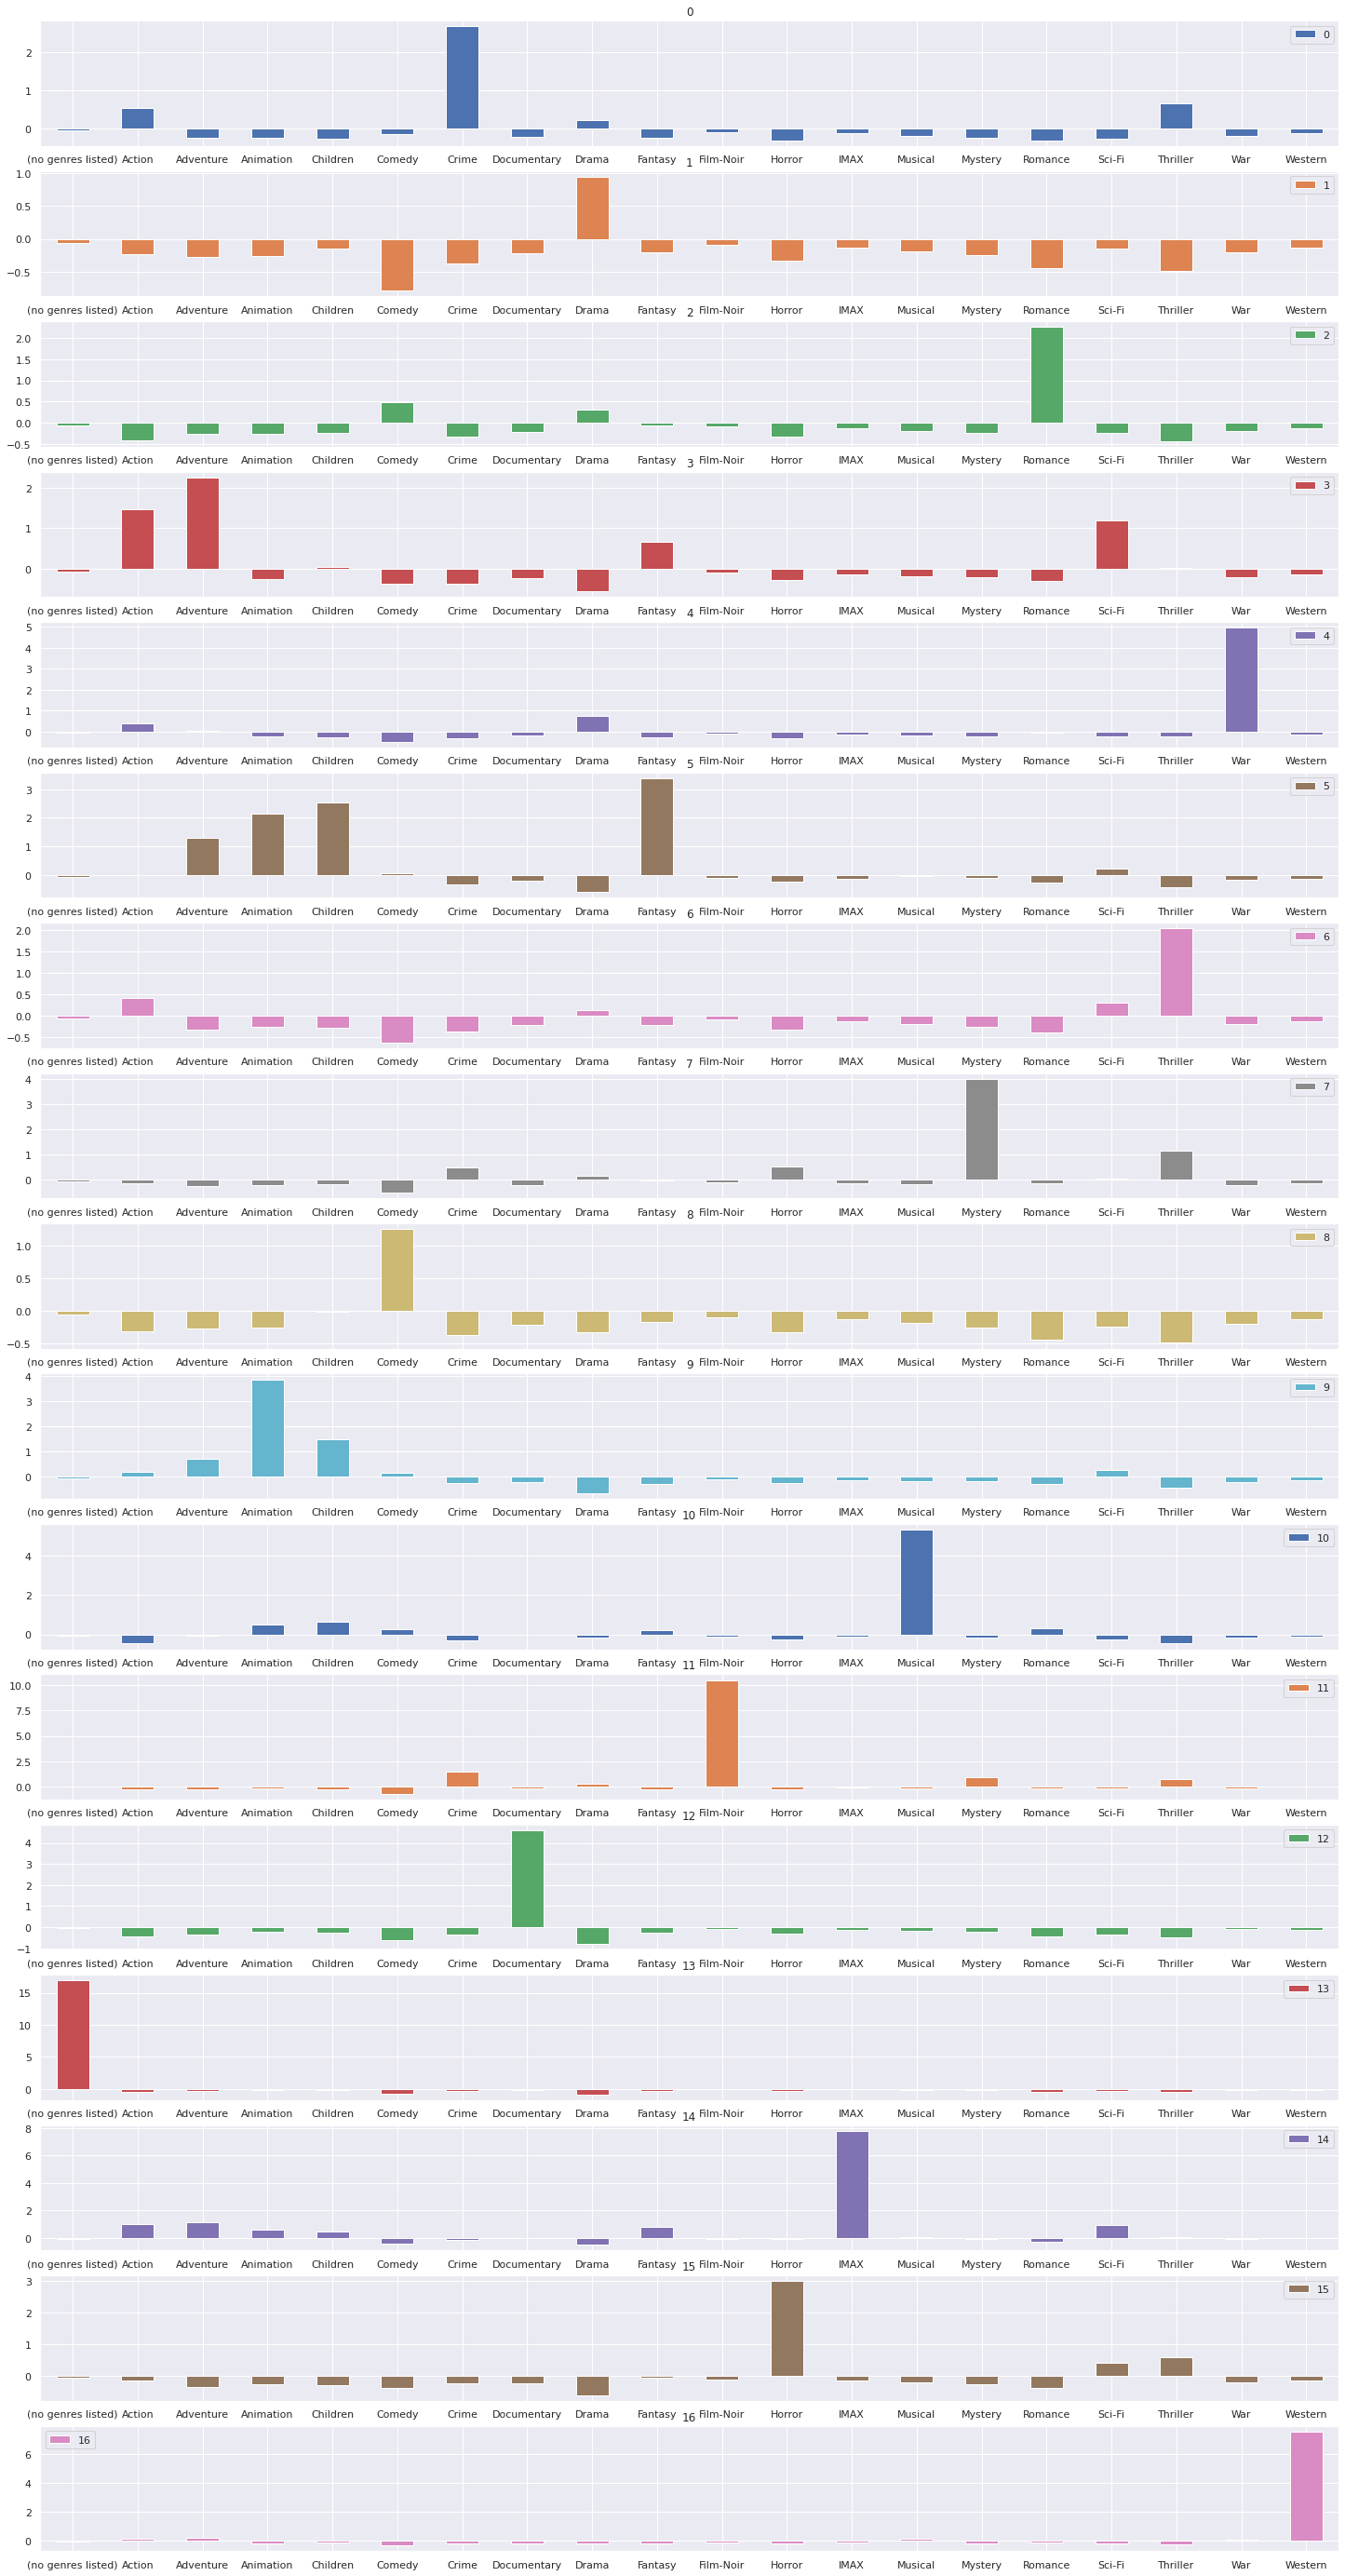

In [ ]:
# instanciar um modelo do KMeans
# passando o número de clusters
# e vamos falar para o modelo aprender um dos generos escalados

modelo = KMeans(n_clusters= 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                            figsize = (25, 50),
                            sharex = False,
                            rot = 0)


In [ ]:
# Tivemos um bom agrupamento, mas vamos fazer um teste com amostra do grupo 0
# como saber mais proximo um do outro ou mais proximo do outro grupo?

grupo = 2 
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,genero,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
3561,4877,Better Than Sex (2000),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3780,5284,Crush (2001),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2509,3357,East-West (Est-ouest) (1999),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3249,4392,Alice (1990),Comedy|Drama|Fantasy|Romance,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1671,2248,Say Anything... (1989),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4735,7057,"Midsummer Night's Dream, A (1935)",Comedy|Fantasy|Romance,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2590,3462,Modern Times (1936),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1612,2154,How Stella Got Her Groove Back (1998),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1837,2443,Playing by Heart (1998),Drama|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5306,8799,Little Black Book (2004),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Question
** Quando testamos um algoritmo de agrupamento como o K-Means, temos que passar o número de grupos que desejamos para segmentar os dados.**

**Quando passamos um número muito pequeno, temos um problema que dados que não pertencem ao mesmo grupo, podem ficar agrupados no mesmo cluster.**

## Resposta

**Qual o problema que enfrentamos se o número de clusters for muito alto?
Quanto mais grupos, mais segmentados os dados ficam. Isso pode causar de existirem dados muito próximos - que pertenceriam ao mesmo grupo - ficarem em grupos diferentes. Logo, o agrupamento não estaria correto**


**Quando o número de grupos é muito elevado, temos justamente o problema de existirem grupos muito semelhantes. Essa semelhança faz com que talvez a melhor solução seja que estes dados estejam agrupados no mesmo grupo**

________________________________________________

Vimos que o K-Means utiliza o erro para ver a qualidade do modelo. Este erro é a distância do centroide para cada dado pertencente ao grupo.

Mas como essa distância é calculada de fato?

O K-Means utiliza a seguinte função de erro. Vamos dizer que a distância de um ponto de um grupo para o centróide vale 2. Quando somamos a distância de todos os pontos, chamamos de erro médio absoluto, ou [_mean absolute error_ (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error) em inglês.

Porém, queremos penalizar os pontos mais distantes do centroide - pois, um ponto muito distante do centroide pode não pertencer àquele grupo.

Uma maneira efetiva de penalizar esses dados é elevando suas distâncias ao quadrado. Isto é, aquela distância de valor 2, quando elevada ao quadrado, vale 4. Portanto, o erro é maior do que antes.

Esse método é chamado de erro médio quadrado, ou [_mean squarred error_ (MSE)](https://pt.wikipedia.org/wiki/Erro_quadr%C3%A1tico_m%C3%A9dio).

Existe uma discussão no [Stack Exchange sobre esses dois tipos de erro](https://stats.stackexchange.com/questions/48267/mean-absolute-error-or-root-mean-squared-error). É interessante dar uma olhada para ver como outras pessoas explicam a respeito do assunto. (Link em inglês)


##mãos a obra

Vamos tentar fazer um agrupamento um pouquinho diferente do primeiro. Neste caso, vamos criar um modelo `K-Means` e falar para ele agrupar os dados em 20 grupos (um para cada gênero). Com o modelo criado, vamos treiná-lo passando os `generos_escalados`:
```
modelo = KMeans(n_clusters=20)

modelo.fit(generos_escalados)
```
Como antes, vamos criar um data frame a partir do centroides do grupo:
```
grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)
```
E plotar um gráfico para cada centroide. Dessa vez, vamos rotacionar (rot) os rótulos do eixo `x` para ficar mas legível:
```
grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)
```
Como antes, vamos pegar algum grupo e fazer uma filtragem no data frame de filmes para ver como foram agrupados:

```
grupo = 2

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)
```

Aparentemente, os dados foram agrupados de uma maneira que faz sentido. Mas então, quantos grupos devemos usar?

Vamos criar a função que recebe o número de clusters e os dados e retorna o número de clusters e o erro (`inertia_`) daquele modelo:



```
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]

```
Vamos rodar essa função começando a agrupar em um único grupo e ir agrupando até 40 grupos. Para isso, vamos usar uma compressão de lista do Python:

```
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
```
```
Lembrando que podemos ver essa lista colocando a variável como último conteúdo da célula.
```

Para facilitar o trabalho, vamos transformar essa variável em um data frame para facilitar sua manipulação:
```
resultado = pd.DataFrame(resultado, 
            columns=['grupos', 'inertia'])
```

Agora, basta plotarmos um gráfico da coluna inertia do data frame. Lembrando que devemos passar a coluna grupos como parâmetro dos rótulos do eixo x:
```
resultado.inertia.plot(xticks=resultado.grupos)
```
Podemos ver que o ponto de quebra no gráfico foi próximo ao número 17, logo, esse é o número de clusters que otimiza nosso modelo. Podemos rodar um novo modelo com 17 grupos e mostrar seus centroides:

```
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)
```

Podemos também realizar um filtro por algum grupo para ver se fazem sentido:

```
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)
```
Veremos que o agrupamento parece fazer muito sentido com o que esperamos.
________________

**Nesta aula, nós vimos:**

* Qual o problema de termos muitos ou poucos grupos
* Como é calculado o erro do modelo
* O que é o elbow method
* Como otimizar o número de clusters para o K-Means

# Agrupamento Hierárquico

## Conhecendo o agrupamento Hierárquico


No último vídeo, tentamos otimizar o número de clusters do nosso algoritmo. Agora, nosso objetivo é encontrarmos uma maneira de identificarmos quais gêneros estão mais próximos entre si, de modo a criarmos um sistema de recomendação que leve em conta esse fator.

O agrupamento que fizemos com o KMeans é chamado de "agrupamento particionado", no qual o algoritmo divide nossos dados em grupos específicos. Mas também existem outros tipos de agrupamentos, por exemplo o agrupamento hierárquico, que tenta definir uma hierarquia entre os dados.

Vamos supor, por exemplo, que o algoritmo consiga demonstrar que os gêneros romance e terror estão muito distantes um do outro. Porém, os gêneros drama e comédia estão bem próximos um do outro. A partir disso, criamos uma espécie de hierarquia, compondo uma estrutura semelhante a uma árvore: nosso conjunto de dados se bifurca nos subconjuntos romance e terror, e romance se bifurca nos subconjuntos drama e comédia.

O algoritmo de agrupamento hierárquico trabalha mais ou menos dessa forma. Ele calcula a chamada "matriz de distância" dos nossos dados, definindo uma distância entre cada um dos grupos.

Esse tipo de algoritmo é muito utilizado para fazer análises de palavras. Por exemplo, imagine um jornal sobre esportes. Podemos rodar esse algoritmo sobre os textos nesse jornal, pedindo que ele agrupe as palavras parecidas. Nesse contexto, por exemplo, a palavra "futebol" estará muito próxima de palavras como "goleiro", "bola" e "atacante". Já uma outra palavra, como "carro", estaria mais próxima de "roda", "acelerador", etc.

Existem basicamente duas formas de trabalhar com agrupamentos hierárquicos. A primeira delas é partindo de um conjunto maior para verificar quais são os subgrupos mais distantes ou mais próximos, que é o que explicamos aqui, e é chamada de "top down". Outro tipo de algoritmo faz justamente o inverso: ele parte dos subgrupos para chegar a um conjunto maior, uma técnica chamada de "bottom up".

In [ ]:
# Qual desses filmes estão bem distantes um do outro - romanca - terror - Filmes
# ROmance - perto de drama e de comédia - Hierárquico - Quase uma árvore
# Calcular a matriz de distâncias
# debaixo para cima
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Criar o modelo agglo vamos passar o número de clusters
# vamos treinar o modelo.fit - generos escalados - retornar os labels - fit_predict

modelo = AgglomerativeClustering(n_clusters = 17)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5, 14, 13, ...,  2,  5,  3])

In [ ]:
# Gráfico de dispersão

tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

In [ ]:
# Vamos chamar o seaborn para plotar pra gente
# palette = sns.color_palette('Set1', 17)) | Mostrou os grupos separados
# tirando ele, teremos um grupo mais próximos dos outros - tivémos que utilizar uma redução - 

sns.scatterplot(x = visualizacao[:, 0],
                y = visualizacao[:,1],
                hue = grupos, palette = sns.color_palette('Set1', 17))
                
plt.show()

# Plotando um dendrograma

Nossa missão agora é plotarmos a estrutura hierárquica dos nossos grupos em uma visualização. O nome do gráfico a ser gerado é "dendrograma" (que vem de "dendro", termo que se refere a árvore).

Para isso, usaremos outra biblioteca muito conhecida no universo da análise de dados e do machine learning, que é a SciPy. Dela, usaremos o módulo scipy.cluster.hierarchy, do qual importaremos duas funções: dendrogram (que irá plotar o gráfico) e linkage (que calculará quão próximas as categorias estão umas das outras).

Queremos agrupar os filmes pelos gêneros, e já fizemos isso com o KMeans. Portanto, iremos plotar um dendrograma dos gêneros que o KMeans agrupou. Dessa forma, conseguiremos reconhecer os gêneros que compõem cada grupo.



Vamos copiar o trecho de código no qual instanciamos o modelo do KMeans, e colaremos na célula após a importação do dendrograma. Feito esse agrupamento, utilizaremos a função linkage(grupos) para conseguirmos a matriz de distâncias desses grupos, armazenando-a em uma variável matriz_de_distancia.

Em seguida, criaremos uma variável dendrograma que receberá o retorno da função dendrogram(), passando como parâmetro a matriz_de_distancia. Se imprimirmos essa variável, teremos uma estrutura de árvore bastante similar àquela que vimos nos slides da primeira aula.

Essa estrutura nos indica, por exemplo, que os grupos 5 (romance), 1 (comédia) e 11 (drama) estão próximos. Os filmes do grupo 4 (ação) também estão um pouco próximos do grupo 5, mas estão ainda mais próximos do grupo 2 (crime). Portanto, se no nosso sistema tivermos um usuário que assiste diversos filmes do grupo 5 (romance), poderemos recomendar a ele filmes do grupo 11 (drama), e as chances dele gostar são muito altas.

Não deixe de consultar as atividades "Para saber mais" para conhecer outras técnicas de agrupamento e entender ainda mais sobre os dendrogramas! 

In [ ]:
# Dendograma - Parece uma árvore
# Vamos utilizar outra biblioteca
# scipy |dendograma =  matriz de distancia os generos um do outro mas ta proximo do outro
# Linkage vai fazer isso para nós

from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
# O que vamos querer agrupar - os generos - quando agrupamos com o KMeans - dendograma dos clusters que o Kmeans agrupou
# O kmeans vai agrupar de outra forma - pra ficar mais perto e o dendograma organizou.

modelo = KMeans(n_clusters= 17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
                      columns = generos.columns)

grupos.transpose().plot.bar(subplots = True,
                            figsize = (25, 50),
                            sharex = False, 
                            rot = 0)

In [ ]:
# precisamos da matriz de distancias - dos grupos do KMeans

matriz_de_distancia = linkage(grupos)
matriz_de_distancia

In [ ]:
# Dendogram retornar o dendogram
# Montou uma estrutura que o filme 1 e o filme 11 estão muito próximos
dendograma = dendrogram(matriz_de_distancia)

Nossa missão agora é plotarmos a estrutura hierárquica dos nossos grupos em uma visualização. O nome do gráfico a ser gerado é "dendrograma" (que vem de "dendro", termo que se refere a árvore).

Para isso, usaremos outra biblioteca muito conhecida no universo da análise de dados e do machine learning, que é a SciPy. Dela, usaremos o módulo scipy.cluster.hierarchy, do qual importaremos duas funções: dendrogram (que irá plotar o gráfico) e linkage (que calculará quão próximas as categorias estão umas das outras).



Queremos agrupar os filmes pelos gêneros, e já fizemos isso com o KMeans. Portanto, iremos plotar um dendrograma dos gêneros que o KMeans agrupou. Dessa forma, conseguiremos reconhecer os gêneros que compõem cada grupo.

Vamos copiar o trecho de código no qual instanciamos o modelo do KMeans, e colaremos na célula após a importação do dendrograma. Feito esse agrupamento, utilizaremos a função linkage(grupos) para conseguirmos a matriz de distâncias desses grupos, armazenando-a em uma variável matriz_de_distancia.

Em seguida, criaremos uma variável dendrograma que receberá o retorno da função dendrogram(), passando como parâmetro a matriz_de_distancia. Se imprimirmos essa variável, teremos uma estrutura de árvore bastante similar àquela que vimos nos slides da primeira aula.

Essa estrutura nos indica, por exemplo, que os grupos 5 (romance), 1 (comédia) e 11 (drama) estão próximos. Os filmes do grupo 4 (ação) também estão um pouco próximos do grupo 5, mas estão ainda mais próximos do grupo 2 (crime). Portanto, se no nosso sistema tivermos um usuário que assiste diversos filmes do grupo 5 (romance), poderemos recomendar a ele filmes do grupo 11 (drama), e as chances dele gostar são muito altas.

Não deixe de consultar as atividades "Para saber mais" para conhecer outras técnicas de agrupamento e entender ainda mais sobre os dendrogramas!

## Question

Entramos em um projeto onde precisamos agrupar alguns animais de uma forma onde conseguimos identificar uma hierarquia entre as espécies.

Espécies parecidas ficam próximas (como peixes ósseos e cartilaginosos) enquanto espécies diferentes devem ficar distantes.

Como podemos efetuar esse agrupamento?

**Resposta**

Através de algum algoritmo de agrupamento hierárquico. Por esse tipo de algoritmo, conseguimos definir modelos que agrupam nossos dados definindo uma hierarquia entre eles


Alternativa correta! Esse tipo de agrupamento permite termos, por exemplo, um grupo, animais aquáticos e dentro desse grupo termos peixes ósseos e os cartilaginosos

____________________________


Na aula, vimos um pouco sobre o agrupamento hierárquico. Para saber um pouco mais, você pode acessar este link: https://www.saedsayad.com/clustering_hierarchical.htm (em inglês).

No curso vimos duas formas de agrupamento, o particionado e o hierárquico. Porém, existem outras formas de agrupar os dados.

Vamos lá. Em todos os exemplos precisamos passar o número de clusters, mas o que acontece quando não temos esse número?

O agrupamento por densidade tenta resolver isso. Nele, não passamos o número de clusters e ele tentará agrupar os dados pela densidade dos pontos.

Vamos pegar os mesmos blobs que geramos no exercício de visualizar os centroides no K-Means:
![imagem](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/blobs.png)


Vamos pedir para o Python importar a classe DBSCAN do módulo de cluster.
```
from sklearn.cluster import DBSCAN
```

Vamos criar o modelo e falar para ele agrupar os dados:
```
modelo = DBSCAN()
grupos = modelo.fit_predict(dados)
```

Plotando e colorindo os dados com o valor do grupo, temos o seguinte resultado:

![img](https://s3.amazonaws.com/caelum-online-public/1086-introducao-a-algoritmos-nao-supervisionado/dbscan.png)

Podemos ver que ele conseguiu agrupar em três grupos distintos, mas o que são esses pontos que não estão nas cores dos grupos?

Esses são os outliers. São os pontos que o DBSCAN achou que não pertenciam aos grupos que estavam próximos.

Para quem tiver interesse em aprender mais sobre esse algoritmo, no mesmo site que usamos para ver o funcionamento do K-Means, também podemos ver o DBSCAN em ação: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Vamos começar importando o algoritmo AgglomerativeClustering da biblioteca sklearn:
```
from sklearn.cluster import AgglomerativeClustering
```

Algoritmo importado, vamos criar um modelo e, seguindo o K-Means, vamos falar que queremos agrupar em `17` grupos. Modelo criado, basta falar para ele aprender e retornar os grupos (`fit_predict`):

```
modelo = AgglomerativeClustering(n_clusters=17)
grupos = modelo.fit_predict(generos_escalados)
```
Vamos rodar o algoritmo TSNE para visualizar os dados. Para isso, vamos utilizar a mesma abordagem que utilizamos anteriormente. Criar um objeto a partir da classe e pedir para ele transformar nossos gêneros:
```
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
```

Bacana! Agora, basta plotar com um gráfico de dispersão passando como parâmetro de cores os grupos criados pelo AgglomerativeClustering:

```
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)
```              
Porém, quando utilizamos o agrupamento hierárquico, uma forma comum de visualização é através do dendrograma. Para plotar o dendrograma, precisamos da matriz de distâncias dos dados e da função que plota o dendrograma propriamente dito. Vamos importá-las da biblioteca scipy:
```
from scipy.cluster.hierarchy import dendrogram, linkage
```
Antes de plotar o dendrograma, vamos agrupar novamente os dados com o K-Means para ter uma visualização dos centroides mais próximos à célula do dendrograma (e para sobrescrever as variáveis que usamos com o mesmo nome):
```
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)
```              
Agora, basta criarmos a matriz de distâncias baseada nos grupos do K-Means e plotar o dendrograma:
```
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)
```

Chegamos ao final do nosso curso de introdução ao aprendizado não-supervisionado. Nesse curso, conseguimos explorar alguns conceitos da área, além de outras ferramentas interessantes.

Utilizamos, por exemplo, o Pandas para pegarmos os dados do nosso dataframe, extrair os dummies e reescalá-los para entendermos quais gêneros mais influenciavam determinado filme.

Conhecemos o algoritmo KMeans e o seu funcionamento, aprendendo o conceito de centroides, e passamos a tentar otimizar os grupos criados por ele - algo que conseguimos fazer com o elbow method.

Além disso, com o TSNE, trabalhamos com redução de dimensionalidade para conseguirmos plotar nossos dados em um gráfico, conseguindo criar uma visualização em duas dimensões de um conjunto que, a priori, tinha 20 dimensões. Também aprendemos que problemas esse tipo de redução traz, como a perda de informações.

Nas últimas aulas do curso, estudamos os tipos de agrupamento e analisamos as possibilidades do agrupamento hierárquico, estabelecendo relações entre os grupos criados pelo KMeans. Ao fim, plotamos um dendrograma, uma estrutura de árvore que permite enxergarmos as relações entre os conjuntos de dados.